# Machine Learning models

### 1. Necessary python libraries imported

In [1]:
#Import libraries
import pandas as pd
from scipy import stats
import sklearn.metrics as sm
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

### 2. Train and test data imported

In [2]:
# Reading the X_train data from the 'xtrain.csv' file
X_train = pd.read_csv('xtrain.csv')

In [3]:
# Reading the X_test data from the 'xtest.csv' file
X_test = pd.read_csv('xtest.csv')

In [4]:
# Reading the y_train data from the 'ytrain.csv' file
y_train = pd.read_csv('ytrain.csv')

In [5]:
# Reading the y_test data from the 'ytest.csv' file
y_test = pd.read_csv('ytest.csv')

## Principal Component Analysis

### 3. PCA run on X_train data

In [7]:
# Perform PCA on all x_train columns except numVotes and box_office
pca = PCA(n_components = 0.90)
pca_movies = pca.fit_transform(X_train[X_train.columns.difference(['numVotes', 'box_office'], sort = False)])
pca_movies_df = pd.DataFrame(data = pca_movies)
pca_movies_df.head()

,0,1,2,3,4,5,6,7,8,9,...,5338,5339,5340,5341,5342,5343,5344,5345,5346,5347
0,-0.556188,-0.175880,-0.033411,0.066500,-0.181467,-0.011089,0.024715,0.044809,0.016793,0.115115,...,-3.285475e-17,-1.852428e-17,-1.416372e-16,5.477899e-17,-1.131050e-16,7.678909e-17,-1.243174e-16,-4.991299e-17,-9.742530e-17,-7.545826e-17
1,-0.612659,-0.187633,-0.074680,0.094700,-0.207868,-0.035469,0.079113,0.331013,-0.023871,-0.074864,...,-7.192225e-16,1.212278e-15,1.035707e-15,-9.190530e-16,2.187099e-16,-9.554831e-17,-5.462901e-16,-2.013549e-15,6.854119e-16,1.160121e-15
2,0.142475,-0.939359,-0.009640,0.105329,0.612499,-0.094943,-0.086141,-0.244208,-0.032479,-0.086812,...,-3.731739e-14,-2.707151e-14,4.052148e-14,-3.193662e-14,-9.196070e-14,-8.286330e-14,2.464151e-14,-1.197933e-14,2.328310e-14,-3.939349e-14
3,-0.644703,0.182740,0.449367,-0.147171,-0.013217,-0.371441,-0.586005,0.023599,-0.011739,0.049480,...,-1.380162e-13,1.116350e-14,1.390415e-13,-4.562736e-14,-2.306937e-14,-4.775806e-14,9.622717e-14,4.244230e-14,1.115703e-13,5.378501e-14
4,-0.633193,-0.190380,-0.084564,0.106074,-0.216500,-0.044144,0.093738,0.379833,-0.032393,-0.064446,...,-1.148871e-15,7.154758e-16,-1.129069e-15,-6.871465e-16,-4.020908e-16,-2.358893e-16,-1.143388e-16,1.328863e-16,6.052143e-16,-7.804179e-16


In [8]:
# Adding numVotes and box_office back to the dataset
X_train = pca_movies_df.join(X_train[['numVotes', 'box_office']])
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,5340,5341,5342,5343,5344,5345,5346,5347,numVotes,box_office
0,-0.556188,-0.175880,-0.033411,0.066500,-0.181467,-0.011089,0.024715,0.044809,0.016793,0.115115,...,-1.416372e-16,5.477899e-17,-1.131050e-16,7.678909e-17,-1.243174e-16,-4.991299e-17,-9.742530e-17,-7.545826e-17,0.000707,0.000776
1,-0.612659,-0.187633,-0.074680,0.094700,-0.207868,-0.035469,0.079113,0.331013,-0.023871,-0.074864,...,1.035707e-15,-9.190530e-16,2.187099e-16,-9.554831e-17,-5.462901e-16,-2.013549e-15,6.854119e-16,1.160121e-15,0.003478,0.000308
2,0.142475,-0.939359,-0.009640,0.105329,0.612499,-0.094943,-0.086141,-0.244208,-0.032479,-0.086812,...,4.052148e-14,-3.193662e-14,-9.196070e-14,-8.286330e-14,2.464151e-14,-1.197933e-14,2.328310e-14,-3.939349e-14,0.094213,0.023703
3,-0.644703,0.182740,0.449367,-0.147171,-0.013217,-0.371441,-0.586005,0.023599,-0.011739,0.049480,...,1.390415e-13,-4.562736e-14,-2.306937e-14,-4.775806e-14,9.622717e-14,4.244230e-14,1.115703e-13,5.378501e-14,0.000343,0.000003
4,-0.633193,-0.190380,-0.084564,0.106074,-0.216500,-0.044144,0.093738,0.379833,-0.032393,-0.064446,...,-1.129069e-15,-6.871465e-16,-4.020908e-16,-2.358893e-16,-1.143388e-16,1.328863e-16,6.052143e-16,-7.804179e-16,0.050609,0.005834


### 4. PCA run on X_test data

In [9]:
# perform PCA on all x_test columns except numVotes and box_office
pca_movies_test = pca.transform(X_test[X_test.columns.difference(['numVotes', 'box_office'], sort = False)])
pca_movies_test_df = pd.DataFrame(data = pca_movies_test)
pca_movies_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,5338,5339,5340,5341,5342,5343,5344,5345,5346,5347
0,-0.399282,0.471396,-1.004526,0.237529,-0.054693,-0.249682,-0.145790,-0.391998,-0.205937,-0.182701,...,-1.112048e-17,2.894735e-17,8.203768e-17,1.464012e-16,-2.719721e-16,-2.094784e-16,1.238125e-16,1.104980e-16,-9.126740e-17,5.217384e-17
1,0.108947,1.110813,0.080458,-0.103627,0.386625,-0.561869,-0.284713,0.288478,-0.135828,0.118309,...,-5.996932e-16,1.283261e-15,8.049430e-16,-4.243906e-16,-4.119087e-16,-2.999958e-16,-3.702720e-16,-1.837353e-15,4.624346e-16,1.846799e-15
2,-0.524178,-0.449343,0.048208,0.484493,0.639375,0.145300,-0.023376,-0.064392,-0.016223,0.033244,...,-3.734003e-14,-2.715428e-14,4.060642e-14,-3.204448e-14,-9.192010e-14,-8.274225e-14,2.478554e-14,-1.202050e-14,2.329993e-14,-3.959806e-14
3,-0.567545,-0.185875,-0.044324,0.069285,-0.201085,-0.021003,0.033178,0.100873,0.011850,0.112043,...,-1.381945e-13,1.135977e-14,1.391936e-13,-4.600309e-14,-2.248576e-14,-4.783399e-14,9.613455e-14,4.212317e-14,1.115201e-13,5.306105e-14
4,0.933115,-0.012837,-0.251199,0.178966,-0.366016,0.142900,-0.327989,-0.250111,-0.019870,-0.331372,...,-1.127673e-15,3.619194e-16,-9.003579e-16,-1.101455e-15,-8.344969e-17,-5.560572e-16,-9.554870e-17,-1.599291e-16,8.960478e-16,-1.268513e-15


In [10]:
# adding numVotes and box_office back to the dataset
X_test = pca_movies_test_df.join(X_test[['numVotes', 'box_office']])
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,5340,5341,5342,5343,5344,5345,5346,5347,numVotes,box_office
0,-0.399282,0.471396,-1.004526,0.237529,-0.054693,-0.249682,-0.145790,-0.391998,-0.205937,-0.182701,...,8.203768e-17,1.464012e-16,-2.719721e-16,-2.094784e-16,1.238125e-16,1.104980e-16,-9.126740e-17,5.217384e-17,0.000895,0.000401
1,0.108947,1.110813,0.080458,-0.103627,0.386625,-0.561869,-0.284713,0.288478,-0.135828,0.118309,...,8.049430e-16,-4.243906e-16,-4.119087e-16,-2.999958e-16,-3.702720e-16,-1.837353e-15,4.624346e-16,1.846799e-15,0.107323,0.140189
2,-0.524178,-0.449343,0.048208,0.484493,0.639375,0.145300,-0.023376,-0.064392,-0.016223,0.033244,...,4.060642e-14,-3.204448e-14,-9.192010e-14,-8.274225e-14,2.478554e-14,-1.202050e-14,2.329993e-14,-3.959806e-14,0.000072,0.000073
3,-0.567545,-0.185875,-0.044324,0.069285,-0.201085,-0.021003,0.033178,0.100873,0.011850,0.112043,...,1.391936e-13,-4.600309e-14,-2.248576e-14,-4.783399e-14,9.613455e-14,4.212317e-14,1.115201e-13,5.306105e-14,0.036031,0.020568
4,0.933115,-0.012837,-0.251199,0.178966,-0.366016,0.142900,-0.327989,-0.250111,-0.019870,-0.331372,...,-9.003579e-16,-1.101455e-15,-8.344969e-17,-5.560572e-16,-9.554870e-17,-1.599291e-16,8.960478e-16,-1.268513e-15,0.000523,0.003950


## Multivariate Linear Regression

### 5. Linear regression fit and prediction

In [11]:
# Getting linear regression instance and fitting X_train and y_train
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
# Linear regression prediction for X_test
lr_predictions = lr.predict(X_test)

In [13]:
# Calculating evealuation metrics
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, lr_predictions), 2)) 
print("R2 score =", round(sm.r2_score(y_test, lr_predictions), 2))
print("Root mean squared error =", round(sm.mean_squared_error(y_test, lr_predictions, squared = False), 2))

Mean absolute error = 0.97
R2 score = -0.34
Root mean squared error = 1.26


## K Nearest Neighbours Regression

### 6. KNN regression fit and prediction

In [14]:
# Getting KNN regression instance and fitting X_train and y_train
neigh = KNeighborsRegressor(n_neighbors=8)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [15]:
# KNN regression prediction for X_test
knn_prediction = neigh.predict(X_test)

In [16]:
# Calculating evealuation metrics
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, knn_prediction), 2))  
print("R2 score =", round(sm.r2_score(y_test, knn_prediction), 2))
print("Root mean squared error =", round(sm.mean_squared_error(y_test, knn_prediction, squared = False), 2))

Mean absolute error = 0.79
R2 score = 0.11
Root mean squared error = 1.03


## Random Forest Regression

### 7. Random forest regression fit and prediction

In [17]:
# Getting Random Forest regression instance and fitting X_train and y_train
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

<ipython-input-17-9d7dec454c4e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor()

In [18]:
# Random Forest regression prediction for X_test
rf_prediction = regr.predict(X_test)

In [19]:
# Calculating evealuation metrics
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, rf_prediction), 2))  
print("R2 score =", round(sm.r2_score(y_test, rf_prediction), 2))
print("Root mean squared error =", round(sm.mean_squared_error(y_test, rf_prediction, squared = False), 2))

Mean absolute error = 0.72
R2 score = 0.27
Root mean squared error = 0.93


## Comparison plot

### 8. Regression evaluation metrics bar plot

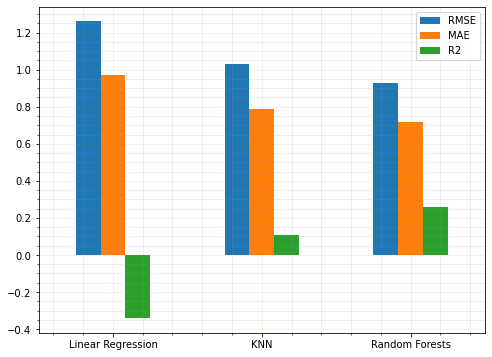

In [20]:
# Bar plot with RMSE, MAE and R2 of linear regression, KNN regression and random forest regression
RMSE = [1.26, 1.03, 0.93]
MAE = [0.97, 0.79, 0.72]
R2 = [-0.34, 0.11, 0.26]
barWidth = 0.25
xlabels = ['Linear Regression', 'KNN','Random Forests']

bar_chart = pd.DataFrame({'RMSE': RMSE,'MAE': MAE,'R2':R2})
bar_chart.plot(kind='bar', figsize=(8,6))

plt.grid(which='major', linestyle='-', linewidth='0.5', color='#999900', alpha=0.2)

plt.xticks(range(0,len(R2)),['Linear Regression', 'KNN','Random Forests'], rotation = 'horizontal')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()